# DECISION TREE CLASSIFIER

# step-1 Import Libraries

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# step-2 Create Dataset

In [13]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain   Normal    Weak  Yes
4      Rain   Normal  Strong   No
5  Overcast   Normal  Strong  Yes


# Encode the data

In [26]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
print(r"C:\Users\DELL\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\93D83F2AA9AE0E0AD643F27D2E147B18B8A262CD\transfers\2026-05\weather_Navie_bayes_dataset.xlsx",df)


C:\Users\DELL\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\93D83F2AA9AE0E0AD643F27D2E147B18B8A262CD\transfers\2026-05\weather_Navie_bayes_dataset.xlsx    Outlook  Humidity  Wind  Play
0        2         0     1     0
1        2         0     0     0
2        0         0     1     1
3        1         1     1     1
4        1         1     0     0
5        0         1     0     1


In [30]:
X = df.drop("Play", axis=1)
y = df["Play"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [34]:
df

,Outlook,Humidity,Wind,Play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,1,1,1
4,1,1,0,0
5,0,1,0,1


In [40]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cu

In [42]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0]


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [52]:
new_data = pd.DataFrame([[2,1,1]], columns =X.columns)
prediction = model.predict(new_data)
print("New Data Prediction:", "Yes" if prediction[0] == 1 else " No")

New Data Prediction: Yes


In [60]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")

Outlook: 0.384
Humidity: 0.000
Wind: 0.616


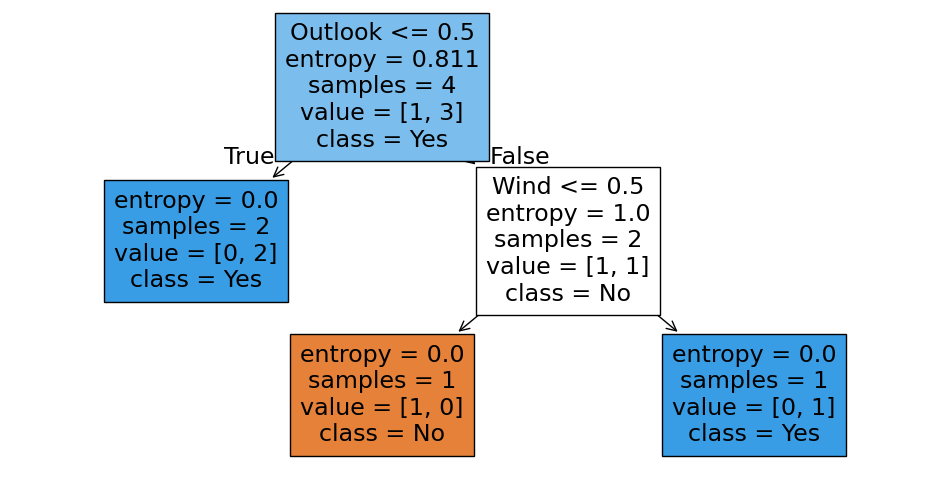

In [62]:
plt.figure(figsize=(12,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No","Yes"],
    filled=True
)
plt.show()